<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Interpolation_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpolation

Many applications in science and engineering involve computing an unknown function and/or its derivatives or integrals based on a limited set of samples obtained through measurements.  In the next part of this class, we're going to use the python skills you've developed to figure out ways to compute these quantities.  We're going to want to pay special attention to the errors that can get introduced into our calculations, which come from both the algorithms we use as well as the numerical precision inherent to computation.

Oftentimes, if you have a set of datapoints from an experiment, you may need to fill in educated guesses for data that is either missing or that was not collected by the experiment.  Given a set of $N$ data points, e.g. ${(x_k,f_k)}$ representing samples from an unknown function $f(x)$,

$f(x_k) \equiv f_k \textrm{ for } k=1,...,N$

we would like to find a "guesstimate" function $g(x)$ that fits all the data points,  That is, we would like:

$g(x_k) \equiv f_k \textrm{ for } k=1,...,N$

and use it to make predictions at other points not included in the data set, $x \not \subset  {x_k}$. If $x$ is between a pair of samples, this is called *interpolation*. If there is no nearby sample on one side, it is referred to as *extrapolation*. Of course, this only makes sense if $N \geq 2$. There are infinitely many possible such functions $g(x)$, so the choice is guided by information about the underlying process which can provide constraints on properties of $g$ (bounds, smoothness, etc.) as well as the ease of computation.

Note the difference between interpolation/extrapolation and fitting. In the former case, we are looking for a function that goes through all the data points. In fitting, we are interested in a function of a particular form, with some parameters $\alpha$, that minimizes the total error, defined in different ways, over the entire data set, often with the uncertainty ${e_k}$ in the data incorporated into the calculation when available. The definition of the total error might look like:

$
\sum_k \left| g\left(x_k;\alpha\right) - f_k \right|\textrm{  absolute error}
$

$
\sum_k \left( g\left(x_k;\alpha\right) - f_k \right)^2\textrm{  square error}
$

$
\sum_k \left(\frac{ g\left(x_k;\alpha\right) - f_k}{\epsilon_k} \right)^2\textrm{ weighted square error}
$


depending on the application. In other words, the total error is constrained to be 0 for interpolation.

## Nearest neighbor interpolation


This is as simple as the name implies, we just assign the value $f_k$ from the point $x_k$ closest to $x$.

$g(x)=f_k, \textrm{ for } |x−x_k|\leq|x−x_j| \textrm{ for all.  } j\neq k
$

Note that this method has a discontinuity halfway between any pair of adjacent data points.

## Polynomial interpolation

Polynomials are a useful choice because they are easy to compute and their properties are well known. Given n points, we can always find an (n − 1)st order polynomial that passes through them. This interpolating polynomial is given by the Lagrange formula:

$
P\left(x\right) =  \sum_{k=1}^n \frac{\prod_{j=1\neq k}^n\left(x-x_j \right)}{\prod_{j=1\neq k}^n\left(x_k-x_j\right)} f_k
\\
= \frac{ \left(x-x_2\right) }{\left(x_1-x_2\right)}  \frac{ \left(x-x_3\right) }{\left(x_1-x_3\right)}...\frac{ \left(x-x_n\right) }{\left(x_1-x_n\right)} f_1 
+\frac{ \left(x-x_1\right) }{\left(x_2-x_1\right)}  \frac{ \left(x-x_3\right) }{\left(x_2-x_3\right)}...\frac{ \left(x-x_n\right) }{\left(x_2-x_n\right)} f_2+...
\frac{ \left(x-x_1\right) }{\left(x_n-x_1\right)}  \frac{ \left(x-x_2\right) }{\left(x_n-x_2\right)}...\frac{ \left(x-x_{n-1}\right) }{\left(x_n-x_{n-1}\right)} f_n
$

That's a complicated looking formula.  BUT it's really not that bad. It's just a sum of polynomials, each of which go up to order $n-1$, and when they are added together you get a final polynomial of order $n-1$.  

**Activity** By hand, plug in the value $x=x_1$ to the Lagrange formula.  What do you get? Is it what you would expect from an interpolation formula?

The above polynomial will give the correct answer, but it can be difficult to use, especially if you have a large number of data points.  You can use a much simpler polynomial which is first-order (that is, a line).  Since a line is only defined by two points, when interpolating you will only use the two points closest to the spot that you are interpolating.  This makes it a "piece-wise" linear interpolation:

$
g\left(x_i < x < x_{i+1}\right) = f_i + \frac{f_{i+1}-f_i}{x_{i+1}-x_i} \left(x-x_i\right)$

The interpolating function $g$ is defined as a series of straight line segments connecting the data points. Note that piecewise polynomial interpolation is not smooth (that is, its first derivatives are not continuous) at the input data points.  Similarly, if you made a higher order polynomial interpolation scheme, you can show that it has discontinuities in derivatives to order n at the data points.

## Python implementations

Python has a number of built in implementations of these (and other) interpolation schemes.  We'll use the ones built into the SciPy (Scientific Python) package, which is an extension of NumPy.  If you go to this website you'll see that there are a number of functions built into this module: https://docs.scipy.org/doc/scipy/reference/interpolate.html .  In general, they are divided between functions that work on one-dimensional and multi-dimensional data.

To load the interpolation module from SciPy, we'll need the following code:

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 10]

The matplotlib import isn't strictly needed, but we'll make use of it below. Also, note that I added two more commands which will control the size of the plots we make below.  If your figures are too big or too small, come back and change these numbers until you get plots that are a good size.


One of the key functions is interp1d, which does one dimensional interpolation.  Look at the help for it here:

In [ ]:
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      'previous', 'next', where 'zero', 'slinear', 'quadratic' and 'cubic'
 |      refer to a spline interpolation of zer

This function requires that you give two inputs: an array of x-values and an array of y-values.  An important third argument is the "kind" argument, which specifies what type of interpolation to perform.  We can use it for performing a linear and nearest neighbor interpolation (in addition to other types).  It returns it's own function that you can give new x-values for to get the corresponding interpolated y-values.

To perform the full Lagrange interpolation polynomial, we need to use the scipy.interpolate.lagrange function.  Let's look at it's help function:

In [ ]:
help(interpolate.lagrange)

Help on function lagrange in module scipy.interpolate.interpolate:

lagrange(x, w)
    Return a Lagrange interpolating polynomial.
    
    Given two 1-D arrays `x` and `w,` returns the Lagrange interpolating
    polynomial through the points ``(x, w)``.
    
    be able to use more than about 20 points even if they are chosen optimally.
    
    Parameters
    ----------
    x : array_like
        `x` represents the x-coordinates of a set of datapoints.
    w : array_like
        `w` represents the y-coordinates of a set of datapoints, i.e. f(`x`).
    
    Returns
    -------
    lagrange : `numpy.poly1d` instance
        The Lagrange interpolating polynomial.
    
    Examples
    --------
    Interpolate :math:`f(x) = x^3` by 3 points.
    
    >>> from scipy.interpolate import lagrange
    >>> x = np.array([0, 1, 2])
    >>> y = x**3
    >>> poly = lagrange(x, y)
    
    Since there are only 3 points, Lagrange polynomial has degree 2. Explicitly,
    it is given by
    
    .. ma

Again, it requires two inputs, the x and y values.  Unlike the interp1d function, it doesn't return interpolated data points, but instead it returns the coefficients of the polynomial it creates.  You then have to feed these coefficients into NumPy's polyval to get the interpolated points.

In [ ]:
help(np.polyval)

Help on function polyval in module numpy:

polyval(p, x)
    Evaluate a polynomial at specific values.
    
    If `p` is of length N, this function returns the value:
    
        ``p[0]*x**(N-1) + p[1]*x**(N-2) + ... + p[N-2]*x + p[N-1]``
    
    If `x` is a sequence, then `p(x)` is returned for each element of `x`.
    If `x` is another polynomial then the composite polynomial `p(x(t))`
    is returned.
    
    Parameters
    ----------
    p : array_like or poly1d object
       1D array of polynomial coefficients (including coefficients equal
       to zero) from highest degree to the constant term, or an
       instance of poly1d.
    x : array_like or poly1d object
       A number, an array of numbers, or an instance of poly1d, at
       which to evaluate `p`.
    
    Returns
    -------
    values : ndarray or poly1d
       If `x` is a poly1d instance, the result is the composition of the two
       polynomials, i.e., `x` is "substituted" in `p` and the simplified
       resu

Here, we'll play with these interpolation functions for interpolating the well-known sine function given a limited subset of data points.

First, we'll set up the data points we know, which will span $-2\pi$ to $2\pi$.


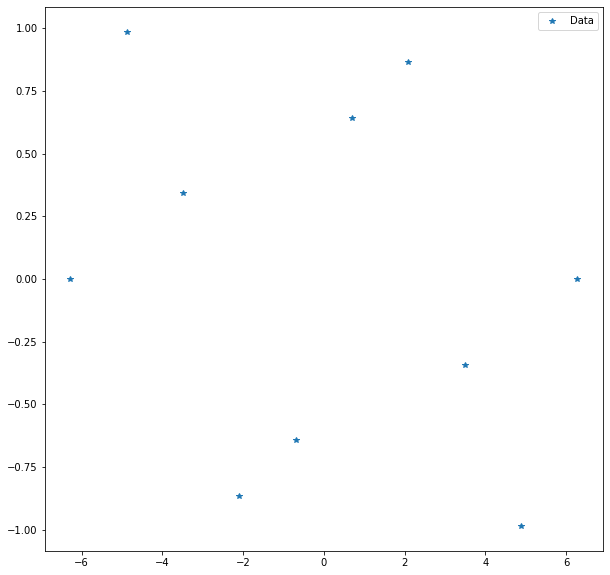

In [ ]:
x_orig = np.linspace(-2.0 *np.pi, 2.0*np.pi,10)
y_orig = np.sin(x_orig)
plt.plot(x_orig,y_orig,'*')
plt.legend(["Data"])
plt.show()

Now let's add some interpolation schemes.  We'll interpolate for x-values stored in x_new and save these values to y_nearest, y_linear, and y_lagrange for the three interpolation methods we've discussed so far:

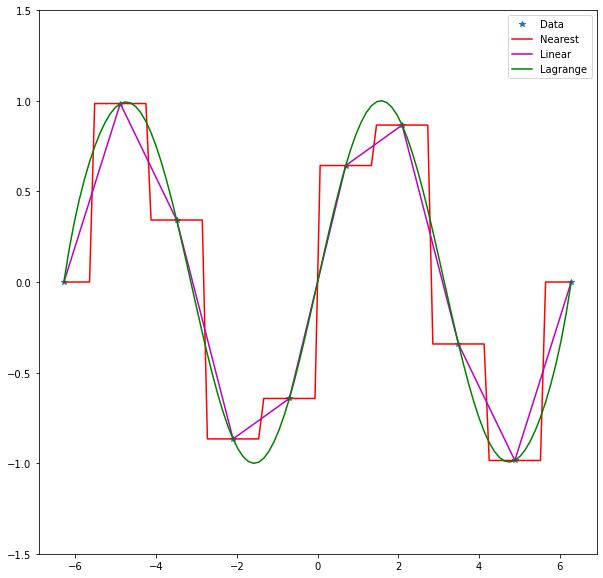

In [ ]:
x_new = np.linspace(-2.0 *np.pi, 2.0*np.pi,100)
f_nearest = interpolate.interp1d(x_orig, y_orig, kind='nearest') #function for nearest neighbor interpolation
f_linear = interpolate.interp1d(x_orig, y_orig, kind='linear') #function for piecewise linear interpolatiomn
p_lagrange = interpolate.lagrange(x_orig,y_orig) #coefficients of lagrange polynomial
y_nearest = f_nearest(x_new)
y_linear = f_linear(x_new)
y_lagrange = np.polyval(p_lagrange,x_new)
plt.plot(x_orig,y_orig,'*')
plt.plot(x_new,y_nearest,'r')
plt.plot(x_new,y_linear,'m')
plt.plot(x_new,y_lagrange,'g')
plt.ylim((-1.5,1.5))
plt.legend(["Data","Nearest","Linear","Lagrange","Exact"])
plt.show()

##Activity:

Try changing the number of data points that are used for making the original data (that is, change the number of points in x_orig).  Try values from 4 all the way to 5.  Also right now there is an even spacing of points, try making another array for x_orig that has an uneven spacing of points.  Answer the following questions:

1.  How does each method do when interpolating to create a sine function?
2.  How which method is the smoothest and why?  Does it change as you change the number of input data points?
3.  When is it best to use the Lagrange method?  When is it best to use the linear or nearest methods?
4.  Do any of the methods create unexpected behavior? If so, when?

## Splines

You may have noticed that as you increase the number of data points, the Lagrange method has some odd behavior.  What's going on here?  This is an example of Runge's phenomenon, in which errors are introduced in the interpolation because the high order polynomial creates large oscillations between interpolation points.  An alternative is to use the idea of piecewise functions, like the piecewise linear interpolation above, but to make them a bit richer.  Spline curves to the rescue!

Spline curves or splines use information from all data points to ensure that the 1st and 2nd derivatives are continuous inside the entire interval. The most popular version, cubic splines, are defined as follows:

$
g(x) = g_k(x), x_k\leq x \leq x_{k+1}, k=1,n−1
$

$
g_k(x) = a_k +b_k (x−x_k)+c_k (x−x_k)^2 +d_k (x−x_k)^3
$

That is, within each of the $(n − 1)$ intervals between $n$ data points, the interpolating function, the spline, is a 3rd order polynomial. Therefore, there are $4(n−1)$ parameters ${a_j,b_j,c_j,d_j}$ for the $(n−1)$ splines. We find the $a_k$ by noting that each of the splines $g_k(x)$ should match the left data point of the interval in which it is defined

$g_k(x_k)=f_k \Rightarrow a_k =f_k$

They must also pass through the right endpoint. In addition, we require that the 1st and 2nd derivatives of $g$ are continuous, which gives us:

$g_k(x_{k+1}) = f_{k+1}, k=1,n−1$

$g_k'(x_{k+1}) = g'_{k+1}, k=1,n−2$

$g_k''(x_{k+1}) = g''_{k+1}, k=1,n−2$


resulting in a total of $3n − 5$ equations for the remaining $3n − 3$ coefficients ${b_j,c_j,d_j}$. In order to fully specify the parameters, two more constraints are needed. These are usually taken as

$g_1''(x_1)=g_{n-1}''(x_n) = 0 $

Solving for all of these variables is a linear algebra problem, which we'll get to later in the course.

## Activity

To implement a cubic spline, you can use the interp1d function above but instead of specifying a "linear" fit use the "cubic" argument.    Do the following:

1.  Copy the code from above and add another curve to your plot that computes a cubic spline.  In addition, add another line to your plot that has the exact solution of $y = \sin (x)$.

2.  Repeat the above exercise, but now compare the performance of the spline curve to the linear and Lagrange methods.  Under which circumstances do linear, cubic spline, and Lagrange work best?

3.  Oftentimes in physics we don't have perfect data, there is typically some sort of noise in what we measure.  We can replicate that noise by adding a random number to our y-values.  Modify your y_orig definition to read:

```
y_orig = np.sin(x_orig) + np.random.normal(0,0.5,len(x_orig))
```

This code adds a random number to each of the sine values.  When you do this, how do the different interpolation mechanisms compare?  Are some of the interpolation mechanisms more sensitive to noise than others?

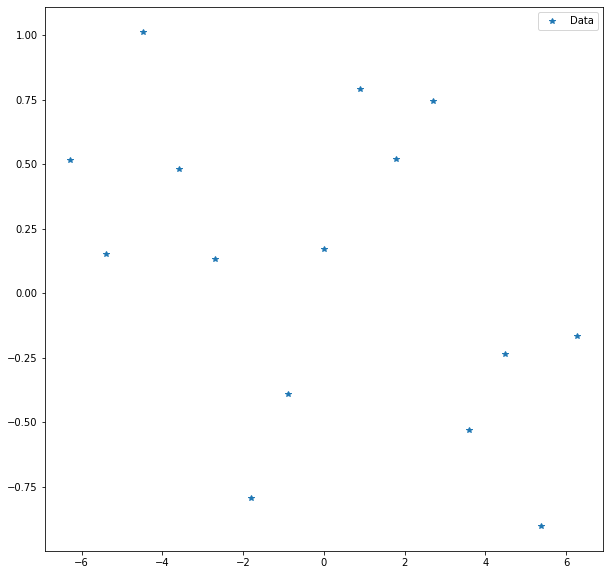

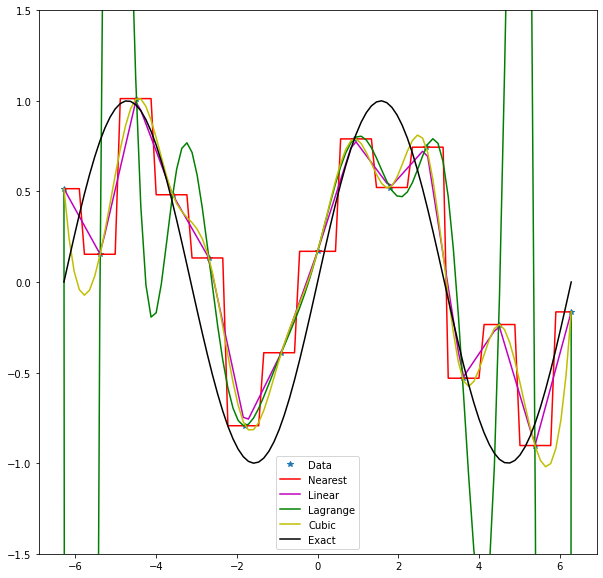

In [ ]:
x_orig = np.linspace(-2.0 *np.pi, 2.0*np.pi,15)
y_orig = np.sin(x_orig) + np.random.normal(0,0.5,len(x_orig))
plt.plot(x_orig,y_orig,'*')
plt.legend(["Data"])
plt.show()

x_new = np.linspace(-2.0 *np.pi, 2.0*np.pi,100)
f_nearest = interpolate.interp1d(x_orig, y_orig, kind='nearest') #function for nearest neighbor interpolation
f_linear = interpolate.interp1d(x_orig, y_orig, kind='linear') #function for piecewise linear interpolation
f_cubic = interpolate.interp1d(x_orig, y_orig, kind='cubic') #function for cubic spline interpolation
p_lagrange = interpolate.lagrange(x_orig,y_orig) #coefficients of lagrange polynomial
y_nearest = f_nearest(x_new)
y_linear = f_linear(x_new)
y_cubic = f_cubic(x_new)
y_exact = np.sin(x_new)
y_lagrange = np.polyval(p_lagrange,x_new)
plt.plot(x_orig,y_orig,'*')
plt.plot(x_new,y_nearest,'r')
plt.plot(x_new,y_linear,'m')
plt.plot(x_new,y_lagrange,'g')
plt.plot(x_new,y_cubic,'y')
plt.plot(x_new,y_exact,'k')
plt.ylim((-1.5,1.5))
plt.legend(["Data","Nearest","Linear","Lagrange","Cubic","Exact"])
plt.show()

## Activity

Repeat the above activity, but this time consider the function:

$y  = \frac{1}{1+ 25 \cdot x^2}$

Over the range of $-1 \leq x \leq 1$.  This is Runge's example where Runge's phenomenon was first demonstrated.  Is it easier or harder to interpolate than our sine example above?

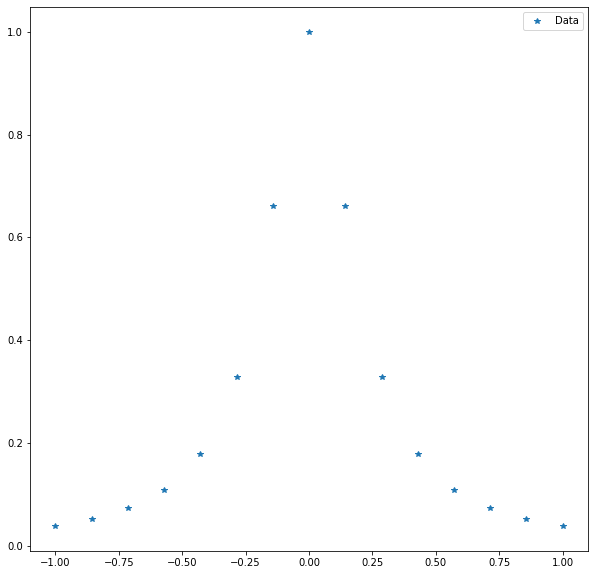

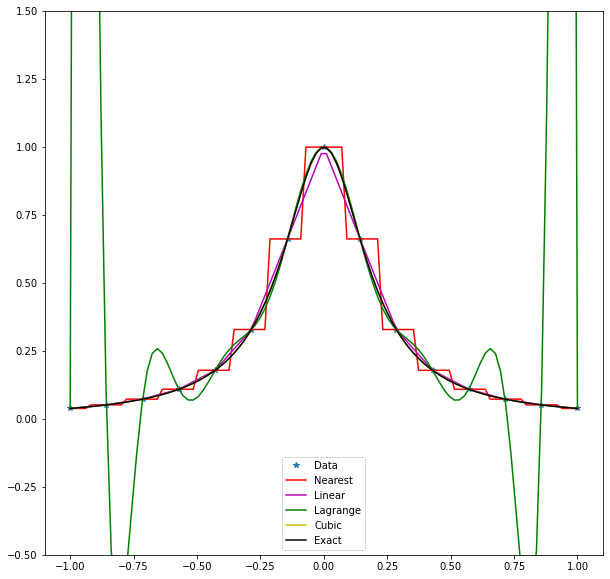

In [ ]:
x_orig = np.linspace(-1.0, 1.0,15)
y_orig = 1.0/(1.0 + 25 *x_orig**2)
plt.plot(x_orig,y_orig,'*')
plt.legend(["Data"])
plt.show()

x_new = np.linspace(-1.0, 1.0,100)
f_nearest = interpolate.interp1d(x_orig, y_orig, kind='nearest') #function for nearest neighbor interpolation
f_linear = interpolate.interp1d(x_orig, y_orig, kind='linear') #function for piecewise linear interpolation
f_cubic = interpolate.interp1d(x_orig, y_orig, kind='cubic') #function for cubic spline interpolation
p_lagrange = interpolate.lagrange(x_orig,y_orig) #coefficients of lagrange polynomial
y_nearest = f_nearest(x_new)
y_linear = f_linear(x_new)
y_cubic = f_cubic(x_new)
y_exact = 1.0/(1.0 + 25 *x_new**2)
y_lagrange = np.polyval(p_lagrange,x_new)
plt.plot(x_orig,y_orig,'*')
plt.plot(x_new,y_nearest,'r')
plt.plot(x_new,y_linear,'m')
plt.plot(x_new,y_lagrange,'g')
plt.plot(x_new,y_cubic,'y')
plt.plot(x_new,y_exact,'k')
plt.ylim((-0.5,1.5))
plt.legend(["Data","Nearest","Linear","Lagrange","Cubic","Exact"])
plt.show()